<a href="https://colab.research.google.com/github/lucas-morais/reconhecimento-automatico-de-digito-manuscrito/blob/dev/model/modelo_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Carregando Bibliotecas
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Carregando dados
dataset = keras.datasets.mnist
((imagens_treino,labels_treino),(imagens_teste, labels_teste)) = dataset.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
imagens_treino[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
imagens_teste[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
# Formato da imagem
imagens_treino[0].shape

(28, 28)

In [7]:
len(imagens_treino)

60000

In [8]:
len(imagens_teste)

10000

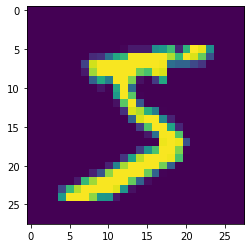

In [9]:
plt.imshow(imagens_treino[0])

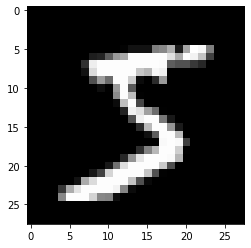

In [10]:
plt.imshow(imagens_treino[0], 'gray')

In [11]:
# Modificando densidade das imagens
imagens_treino = imagens_treino.reshape(60000, 28, 28, 1)
imagens_treino = imagens_treino/255.0
imagens_teste = imagens_teste.reshape(10000, 28, 28, 1)
imagens_teste = imagens_teste/255.0



Epoch 1/5
1875/1875 [==============================] - 43s 7ms/step - loss: 0.1190 - accuracy: 0.9637
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0393 - accuracy: 0.9874
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0277 - accuracy: 0.9912
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0194 - accuracy: 0.9939
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0136 - accuracy: 0.9954
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (32, 26, 26, 64)          640       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 13, 13, 64)         0         
 )                                                               
                                                                 
 conv2d_

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')                             
])
#model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(imagens_treino, labels_treino, epochs=5)
test_loss = model.evaluate(imagens_teste, labels_teste)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1220 - accuracy: 0.9627
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0398 - accuracy: 0.9870
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0275 - accuracy: 0.9912
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0186 - accuracy: 0.9943
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0295 - accuracy: 0.9902


In [17]:
!pip install tensorflowjs

     |████████████████████████████████| 64 kB 2.6 MB/s 


In [27]:
import tensorflowjs as tfjs

<module 'tensorflowjs.converters' from '/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/__init__.py'>

In [18]:
# montando google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
!ls

drive  sample_data


In [26]:
dir = 'drive/MyDrive/Workspace/Projetos/reconhecimento-automatico-de-digitos-manuscritos'

In [28]:
# Salvando modelo no google drive
tfjs.converters.save_keras_model(model, dir)

In [29]:
ls drive/MyDrive/Workspace/Projetos/reconhecimento-automatico-de-digitos-manuscritos/

group1-shard1of1.bin  model.json  modelo-mnist.ipynb
